# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))
n_classes_test= len(set(y_test))
image_shape_y_train = y_train[1].shape
image_shape_y_test = y_test.shape

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of classes_test =", n_classes_test)
print("Number of classes_y_train =", y_train)
print("Number of classes_y_test =", y_test)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of classes_test = 43
Number of classes_y_train = [ 0  0  0 ..., 42 42 42]
Number of classes_y_test = [16  1 38 ...,  6  7 10]


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The TrafficClassifier-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

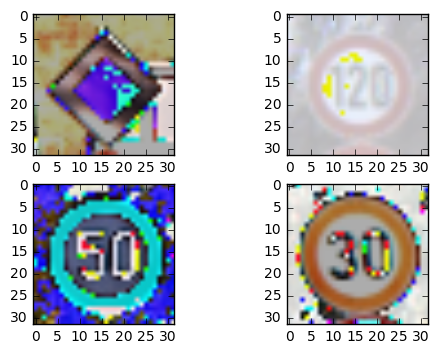

In [15]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Plot four sample images

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=7)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i+100])

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=7)

X_train_orig = X_train
X_test_orig = X_test

# Standardization 
X_train_std = (X_train - X_train.mean()) / np.std(X_train)
X_test_std = (X_test - X_test.mean()) /np.std(X_test)

# Normalisation
X_train_norm = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test_norm = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

In [5]:
# This will be the input
X_train = X_train_norm
X_test = X_test_norm

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. I shuffled the data as input was in a sequence
2. I normalized the data to be in between 0-1; normalization is done so that we don't weigh towards a perticular feature and also I didn't want to consider any outliers. 

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#Split training data into training and validation
from sklearn.model_selection import train_test_split

X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I split the data into training and validation; so that I have a set to test the pipeline and avoid overfitting before running it on test data.

In [7]:
### Define your architecture here.
# Network parameters
n_input = 32 * 32 * 3
nb_filters = 32
kernel_size = (3, 3)
input_shape = (32, 32, 3)
n_fc1 = 512
n_fc2 = 128
in_channels = 3

In [8]:
# tf Graph input
x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
x = x_unflattened

y_rawlabels = tf.placeholder("int32", [None])
y = tf.one_hot(y_rawlabels, depth=43, on_value=1., off_value=0., axis=-1)



In [9]:
from tensorflow.contrib.layers import flatten

def TrafficClassifier(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 16*16*32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 2, 2, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    print (conv1)
    
    #Pooling. Input = 16*16*32. Output = 8*8*32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print (conv1)
  
    # Flatten. Input = 8*8*32. Output = 2048.
    fc0   = flatten(conv1)
    print (fc0)
    
    # Layer 2: Fully Connected. Input = 2048. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    

    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.80)
    print (fc1)
    
    # Layer 3: Fully Connected. Input = 512. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, 0.80)
    print (fc2)
    
    # Layer 4: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print (logits)
    return logits

In [10]:
rate = 0.001

logits = TrafficClassifier(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("Relu:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 8, 8, 32), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(?, 2048), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 512), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 512), dtype=float32)
Tensor("add_3:0", shape=(?, 43), dtype=float32)


In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x_unflattened: batch_x, y_rawlabels: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
EPOCHS = 30
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x_unflattened: batch_x, y_rawlabels: batch_y})
            
        validation_accuracy = evaluate(x_val,y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'TrafficClassifier1')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.737

EPOCH 2 ...
Validation Accuracy = 0.826

EPOCH 3 ...
Validation Accuracy = 0.903

EPOCH 4 ...
Validation Accuracy = 0.917

EPOCH 5 ...
Validation Accuracy = 0.932

EPOCH 6 ...
Validation Accuracy = 0.933

EPOCH 7 ...
Validation Accuracy = 0.940

EPOCH 8 ...
Validation Accuracy = 0.946

EPOCH 9 ...
Validation Accuracy = 0.957

EPOCH 10 ...
Validation Accuracy = 0.954

EPOCH 11 ...
Validation Accuracy = 0.957

EPOCH 12 ...
Validation Accuracy = 0.960

EPOCH 13 ...
Validation Accuracy = 0.958

EPOCH 14 ...
Validation Accuracy = 0.963

EPOCH 15 ...
Validation Accuracy = 0.961

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.967

EPOCH 18 ...
Validation Accuracy = 0.966

EPOCH 19 ...
Validation Accuracy = 0.964

EPOCH 20 ...
Validation Accuracy = 0.968

EPOCH 21 ...
Validation Accuracy = 0.967

EPOCH 22 ...
Validation Accuracy = 0.961

EPOCH 23 ...
Validation Accuracy = 0.964

EPOCH 24 ...
Validation Accura

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [82]:
#with tf.Session() as sess:
   # loader = tf.train.import_meta_graph('TrafficClassifier.meta')
   # loader.restore(sess, tf.train.latest_checkpoint('./'))

    #test_accuracy = evaluate(X_test, y_test)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [130]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Helper function to read image copied from lane lines project
def read_image_and_print_dims(image_path):
    """Reads and returns image.
    Helper function to examine how an image is represented.
    """
    #reading in an image
    image = mpimg.imread(image_path)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image
    return image

In [131]:
sess = tf.Session()
new_saver = tf.train.import_meta_graph('TrafficClassifier1.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))
all_vars = tf.trainable_variables()


This image is: <class 'numpy.ndarray'> with dimensions: (1024, 1022, 3)


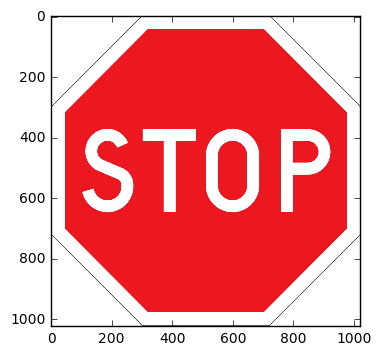

In [134]:
sign = read_image_and_print_dims('traffic-signs-data/0.png')
sign_reshaped = cv2.resize(sign, (32,32))

In [137]:
def predict(img):
    sess.run(tf.initialize_all_variables())
    classification = sess.run(tf.argmax(logits, 1), feed_dict={x_unflattened: [img]})
    #classification = sess.run(tf.argmax(logits, 1), feed_dict={x_unflattened: [img]})
    #classification = sess.run(tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1)))
    print(classification)
    print('NN predicted', classification[0])
                       
predict(sign_reshaped)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[19]
NN predicted 19


In [ ]:
Ignore everything below this

This image is: <class 'numpy.ndarray'> with dimensions: (911, 1024, 3)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
[38]
NN predicted 38


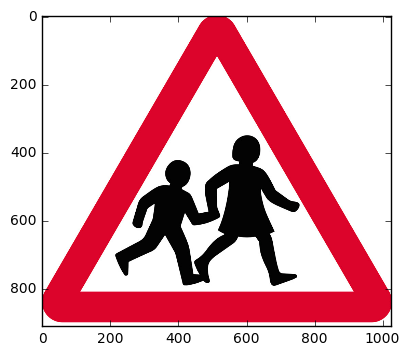

In [91]:
# sign = read_image_and_print_dims('traffic-signs-data/5.jpg')
# sign_reshaped = cv2.resize(sign, (32,32))
# sess.run(tf.initialize_all_variables())
# classification = sess.run(tf.argmax(logits, 1), feed_dict={x_unflattened: [sign_reshaped]})
# sign_reshaped=[0]
#     #classification = sess.run(tf.argmax(logits, 1), feed_dict={x_unflattened: [img]})
#     #classification = sess.run(tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1)))
# print(classification)
# print('NN predicted', classification[0])

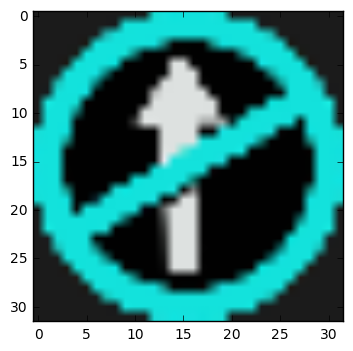

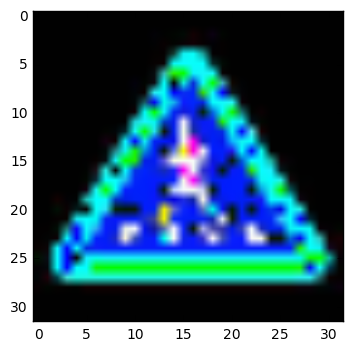

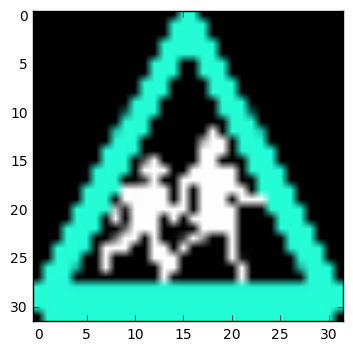

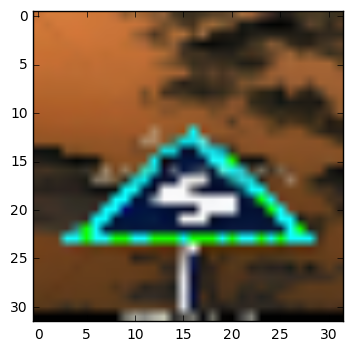

In [122]:
# nb_of_images = 5
# new_images1=[None]*10
# #new_images = np.float32(np.zeros((nb_of_images,32,32,3)))
# for i in range(1,nb_of_images):
#     #image = mpimg.imread(image_path)
#     image = mpimg.imread("traffic-signs-data/test_images/test{}.jpg".format(str(i)))
#     image = cv2.resize(image,(32,32))
#     #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     #image = image/255.-.5
#     new_images1[i] = image
#     #plt.figure(figsize = (1,1))
#     plt.imshow(new_images[i])
#     plt.show()

In [124]:
# new_dict = tf.placeholder(tf.float32, (None, 32, 32, 3))
# preds = tf.nn.softmax(TrafficClassifier(new_dict))

# with tf.Session() as sess:
#     sess.run(tf.initialize_all_variables())
#     #saver.restore(sess, 'TrafficClassifier1.meta')
#     new_saver = tf.train.import_meta_graph('TrafficClassifier1.meta')
#     new_saver.restore(sess, tf.train.latest_checkpoint('./'))
#     print('model restored')
    
#     classification = sess.run(tf.argmax(logits, 1), feed_dict={x_unflattened: [new_images1]})

#     #values = sess.run(preds, feed_dict = {new_dict: new_images})
#     #top_k = sess.run(tf.nn.top_k(values, 5, sorted = True))
#     #print(np.argmax(values, 1))
#     #print('Done predicting with downloaded test images')
#     print (classification)
    

Tensor("Relu_111:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("MaxPool_55:0", shape=(?, 8, 8, 32), dtype=float32)
Tensor("Flatten_28/Reshape:0", shape=(?, 2048), dtype=float32)
Tensor("dropout_56/mul:0", shape=(?, 512), dtype=float32)
Tensor("dropout_57/mul:0", shape=(?, 512), dtype=float32)
Tensor("add_142:0", shape=(?, 43), dtype=float32)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
model restored


ValueError: setting an array element with a sequence.

In [104]:
#labels_pred = tf.nn.softmax(fc_layer3)

# def topk(img):
#     sess.run(tf.initialize_all_variables())
#     predictions = sess.run(logits,feed_dict={x_unflattened:[img]})
#     top3 = sess.run(tf.nn.top_k(predictions, 3))    
#     print ("Top 3 predictions are:")
#     print (top3)
    
# topk(sign_reshaped)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


RuntimeError: Attempted to use a closed Session.

In [40]:
##run

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.